In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import pandas.testing as tm
%matplotlib inline

In [3]:
heart = pd.read_csv('heart.csv')

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


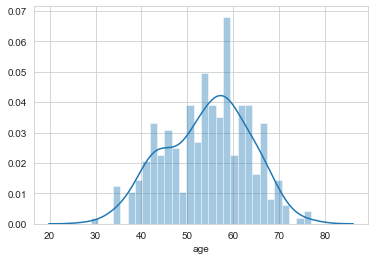

In [17]:
sns.distplot(heart['age'],bins = 30)

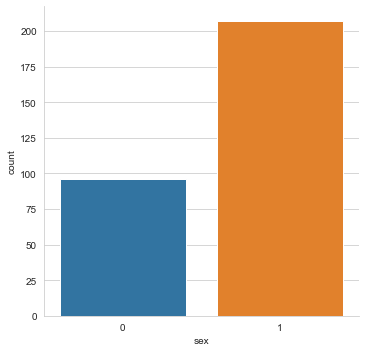

In [18]:
sns.catplot(x = 'sex',data = heart,kind = 'count')

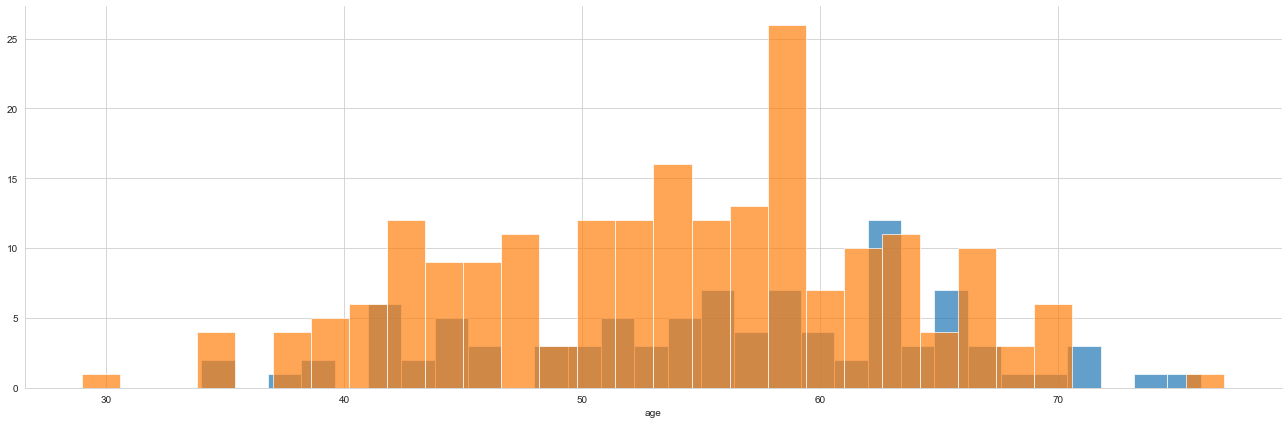

In [31]:

fig = sns.FacetGrid(heart,hue = 'sex',sharey = True,aspect = 3,height = 6)
fig.map(plt.hist,'age',bins = 30,alpha = 0.7)

In [33]:
#LOGISTIC MODEL

In [34]:
Xl = heart.drop('target',axis = 1)
yl = heart['target']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Xl,yl,test_size = 0.3,random_state = 101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lg = LogisticRegression()

In [39]:
lg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predict = lg.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(confusion_matrix(y_test,predict))
print('/n')
print(classification_report(y_test,predict))

[[35  9]
 [ 2 45]]
/n
              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



In [45]:
# k neighbour

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
Xk = Xl
yk = yl
Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk,yk,test_size = 0.3,random_state = 101)

In [49]:
err = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xk_train,yk_train)
    predict_i = knn.predict(Xk_test)
    err.append(np.mean(predict_i != yk_test))

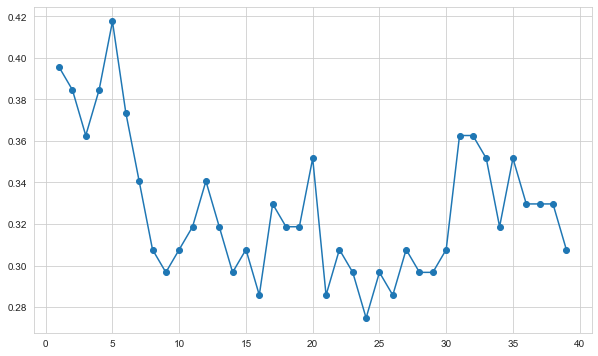

In [53]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),err,marker = 'o')

In [56]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(Xk_train,yk_train)
predict_i = knn.predict(Xk_test)

In [57]:
print(confusion_matrix(yk_test,predict_i))
print('/n')
print(classification_report(yk_test,predict_i))

[[28 16]
 [11 36]]
/n
              precision    recall  f1-score   support

           0       0.72      0.64      0.67        44
           1       0.69      0.77      0.73        47

    accuracy                           0.70        91
   macro avg       0.71      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



In [58]:
# SUPPORT VECTOR MACHINE

In [59]:
from sklearn.svm import SVC

In [60]:
scm = SVC()

In [61]:
scm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
pre = scm.predict(X_test)

In [63]:
print(confusion_matrix(y_test,pre))
print('/n')
print(classification_report(y_test,pre))

[[ 0 44]
 [ 0 47]]
/n
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.52      1.00      0.68        47

    accuracy                           0.52        91
   macro avg       0.26      0.50      0.34        91
weighted avg       0.27      0.52      0.35        91



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
from sklearn.model_selection import GridSearchCV 

In [65]:
param = {'C':[0.1,0.01,1,2,10,100,1000,10000],'gamma':[0.001,0.1,0.0001,0.0002,1,0.5,0.0012,0.3]}

In [69]:
grr = GridSearchCV(SVC(),param_grid=param,verbose = 3)

In [70]:
grr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.557, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.557, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.557, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.557, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ..........

[CV] ...................... C=1, gamma=0.5, score=0.556, total=   0.0s
[CV] C=1, gamma=0.5 ..................................................
[CV] ...................... C=1, gamma=0.5, score=0.557, total=   0.0s
[CV] C=1, gamma=0.5 ..................................................
[CV] ...................... C=1, gamma=0.5, score=0.557, total=   0.0s
[CV] C=1, gamma=0.0012 ...............................................
[CV] ................... C=1, gamma=0.0012, score=0.611, total=   0.0s
[CV] C=1, gamma=0.0012 ...............................................
[CV] ................... C=1, gamma=0.0012, score=0.571, total=   0.0s
[CV] C=1, gamma=0.0012 ...............................................
[CV] ................... C=1, gamma=0.0012, score=0.543, total=   0.0s
[CV] C=1, gamma=0.3 ..................................................
[CV] ...................... C=1, gamma=0.3, score=0.556, total=   0.1s
[CV] C=1, gamma=0.3 ..................................................
[CV] .

[CV] ................. C=100, gamma=0.0002, score=0.629, total=   0.0s
[CV] C=100, gamma=0.0002 .............................................
[CV] ................. C=100, gamma=0.0002, score=0.729, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.556, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.557, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.557, total=   0.0s
[CV] C=100, gamma=0.5 ................................................
[CV] .................... C=100, gamma=0.5, score=0.556, total=   0.0s
[CV] C=100, gamma=0.5 ................................................
[CV] .................... C=100, gamma=0.5, score=0.557, total=   0.0s
[CV] C=100, gamma=0.5 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    1.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.01, 1, 2, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.1, 0.0001, 0.0002, 1, 0.5, 0.0012,
                                   0.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [71]:
grr.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
grr.best_params_

{'C': 100, 'gamma': 0.0001}

In [73]:
pre2 = grr.predict(X_test)

In [74]:
print(confusion_matrix(y_test,pre2))
print('/n')
print(classification_report(y_test,pre2))

[[32 12]
 [ 4 43]]
/n
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dtc = DecisionTreeClassifier()

In [77]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
tree_predict = dtc.predict(X_test)

In [80]:
print(confusion_matrix(y_test,tree_predict))
print('/n')
print(classification_report(y_test,tree_predict))

[[29 15]
 [ 2 45]]
/n
              precision    recall  f1-score   support

           0       0.94      0.66      0.77        44
           1       0.75      0.96      0.84        47

    accuracy                           0.81        91
   macro avg       0.84      0.81      0.81        91
weighted avg       0.84      0.81      0.81        91



In [103]:
scores = {'decisiontree':dtc.score(X_test,y_test)*100,
          'neighbour':knn.score(Xk_test,yk_test)*100,'logisticregression':lg.score(X_test,y_test)*100,'supportvectormachine':grr.score(X_test,y_test)*100}

Text(0, 0.5, 'Classification Models')

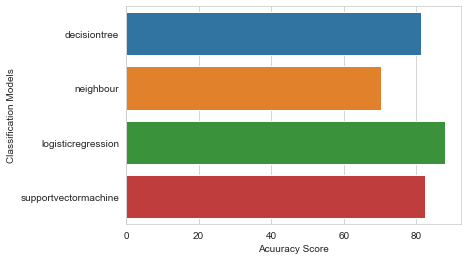

In [105]:
sns.barplot(y = list(scores.keys()),x = list(scores.values()))
plt.xlabel('Acuuracy Score')
plt.ylabel('Classification Models')